In [1]:
import numpy as np
import scipy.stats
import pylab as plt
from matplotlib import pyplot as plt
from scipy import stats
import random
import math

!pip install astroML
from astroML.datasets import fetch_dr7_quasar

import astropy

import time

In [2]:
# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
#data = data[:10000]

z = data['redshift']

In [3]:
def parabola (a,b,c,x):
    return a*x**2+b*x+c

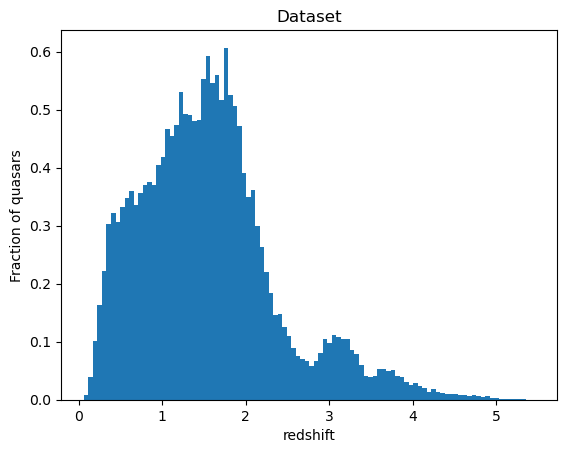

In [6]:
#rejection sampling
bin = 100
a,b,c = plt.hist(z,bin,density=True)
plt.xlabel('redshift')
plt.ylabel('Fraction of quasars')
plt.title('Dataset')
plt.show()

#expected distribution: periodic
#z = const * (N-M)  where M = M(n), n quantum number, M(n) is different with N 
#peaks separation: delta(z) = 0.7 circa

## Rejection sampling

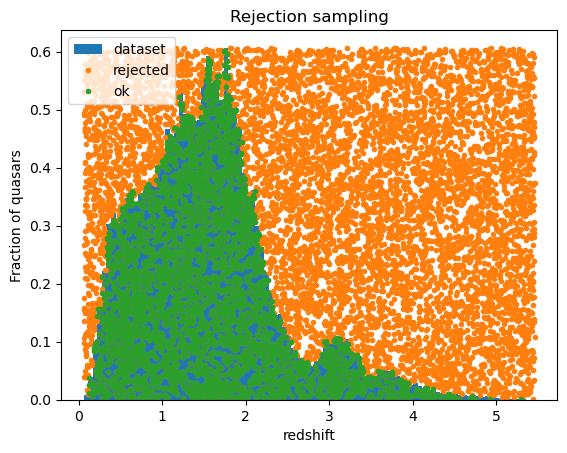

In [9]:
bin = 100
a,b,c = plt.hist(z,bin,density=True,label='dataset')

x = np.random.uniform(np.min(z),np.max(z),10000)  #casual numbers generated in a box
y = np.random.uniform(np.min(a),np.max(a),10000)

index_x = np.searchsorted(b,x)-1  #index of the bean where I find each x
sample_x = x[y<a[index_x]] #casual numbers that I keep: my new sample
sample_y = y[y<a[index_x]]

plt.plot(x,y,'.',label='rejected')
plt.plot(sample_x,sample_y,'.',label='ok')

plt.xlabel('redshift')
plt.ylabel('Fraction of quasars')
plt.title('Rejection sampling')
plt.legend()
plt.show()

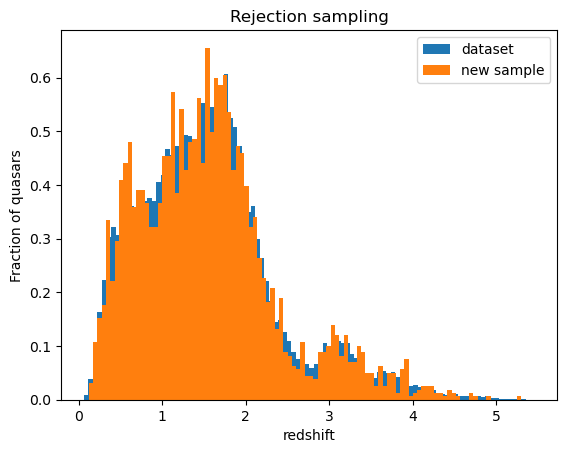

In [10]:
#check that the two distributions look similar
a,b,c = plt.hist(z,bin,density=True,label='dataset')
a,b,c = plt.hist(sample_x,bin,density=True,label='new sample')
plt.title('Rejection sampling')
plt.xlabel('redshift')
plt.ylabel('Fraction of quasars')
plt.legend()
plt.show()

## Inverse transform sampling

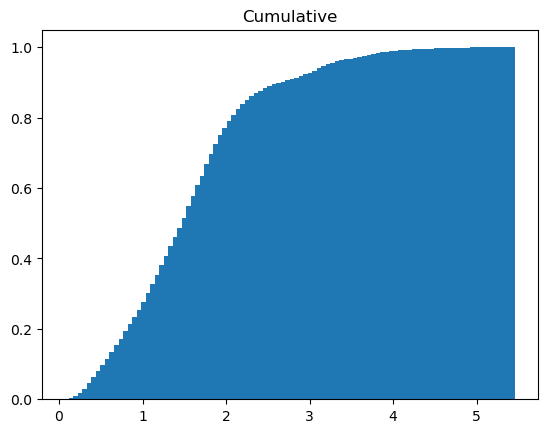

In [17]:
a,b,c = plt.hist(z,bin,density=True,cumulative=True)
plt.title('Cumulative')
plt.show()

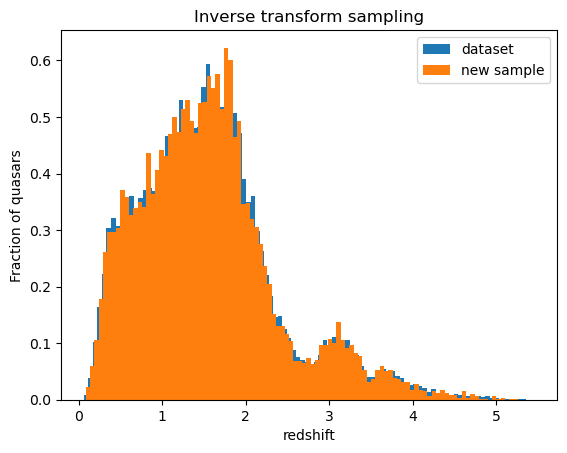

In [18]:
u = np.random.uniform(0,1,10000)
index_u = np.searchsorted(a,u)
sample_x = np.random.uniform(b[index_u],b[index_u+1])

a0,b0,c0 = plt.hist(z,bin,density=True,label='dataset')
a1,b1,c1=plt.hist(sample_x,100,density=True,label='new sample')
plt.title('Inverse transform sampling')
plt.xlabel('redshift')
plt.ylabel('Fraction of quasars')
plt.legend()
plt.show()